**Общая информация**

**Срок сдачи:** 21 октября 2020, 08:30 

**Штраф за опоздание:** по 1 баллу за 24 часа задержки. Через 5 дней домашнее задание сгорает.

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0220, Задание 1] Фамилия Имя.

Используйте данный Ipython Notebook при оформлении домашнего задания.


**Штрафные баллы:**

1. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -0.5 баллов
2. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -0.5 баллов


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import BaseEstimator
from sklearn.datasets import fetch_mldata, fetch_20newsgroups

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KDTree
from sklearn.metrics import accuracy_score

from scipy.spatial.distance import cdist
from scipy.stats import mode

##### Задание 1 (1 балл)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. 
Для подсчета расстояний можно использовать функции [отсюда](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html)

In [2]:
class MyKNeighborsClassifier(BaseEstimator):
    
    def __init__(self, n_neighbors, algorithm='brute', metric='euclidean'):
        self.n_neighbors = n_neighbors
        self.algorithm = algorithm
        self.metric = metric
    
    def fit(self, X, y):
        self.y = y
        if self.algorithm == 'kd_tree':
            self.tree = KDTree(X, metric=self.metric)
        else:
            self.X = X
    
    def predict(self, X):
        if self.algorithm == 'kd_tree':
            indices = self.tree.query(X, self.n_neighbors, return_distance=False)
            target = mode(self.y[indices], axis=1)[0].ravel()
        else:
            dist = cdist(X, self.X, metric=self.metric)
            indices = dist.argpartition(self.n_neighbors, axis=1)[:,:self.n_neighbors:1]
            target = mode(self.y[indices], axis=1)[0].ravel()
        return target
    

**IRIS**

В библиотеке scikit-learn есть несколько датасетов из коробки. Один из них [Ирисы Фишера](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0)

In [3]:
iris = datasets.load_iris()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [5]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [6]:
clf.fit(X_train, y_train)
my_clf.fit(X_train, y_train)

In [7]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 2 (0.5 балла)**

Давайте попробуем добиться скорости работы на fit, predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. 

In [8]:
%time clf.fit(X_train, y_train)

CPU times: user 1.46 ms, sys: 430 µs, total: 1.89 ms
Wall time: 1.6 ms


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [9]:
%time my_clf.fit(X_train, y_train)

CPU times: user 13 µs, sys: 4 µs, total: 17 µs
Wall time: 22.9 µs


In [10]:
%time clf.predict(X_test)

CPU times: user 3.23 ms, sys: 851 µs, total: 4.08 ms
Wall time: 4.06 ms


array([1, 0, 1, 0, 2, 2, 2, 1, 0, 1, 0, 1, 0, 2, 2])

In [11]:
%time my_clf.predict(X_test)

CPU times: user 2.45 ms, sys: 595 µs, total: 3.04 ms
Wall time: 2.17 ms


array([1, 0, 1, 0, 2, 2, 2, 1, 0, 1, 0, 1, 0, 2, 2])

###### Задание 3 (1 балл)
Добавьте algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Необходимо добиться скорости работы на fit,  predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. Точность не должна уступать значению KNN из sklearn. 

In [12]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [13]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [14]:
%time clf.fit(X_train, y_train)

CPU times: user 2.8 ms, sys: 0 ns, total: 2.8 ms
Wall time: 5.76 ms


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [15]:
%time my_clf.fit(X_train, y_train)

CPU times: user 193 µs, sys: 53 µs, total: 246 µs
Wall time: 236 µs


In [16]:
%time clf.predict(X_test)

CPU times: user 2.68 ms, sys: 0 ns, total: 2.68 ms
Wall time: 2.3 ms


array([0, 2, 1, 0, 1, 2, 0, 2, 1, 2, 0, 1, 1, 1, 0])

In [17]:
%time my_clf.predict(X_test)

CPU times: user 2.04 ms, sys: 0 ns, total: 2.04 ms
Wall time: 1.61 ms


array([0, 2, 1, 0, 1, 2, 0, 2, 1, 2, 0, 1, 1, 1, 0])

In [18]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 4 (2.5 балла)**

Рассмотрим новый датасет 20 newsgroups

In [19]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import KFold

In [20]:
newsgroups = fetch_20newsgroups(subset='train',remove=['headers','footers', 'quotes'])

In [21]:
data = newsgroups['data']
target = newsgroups['target']

In [22]:
data[0]

'I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.'

In [23]:
len(target)

11314

In [24]:
np.unique(np.asarray(target), return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 array([480, 584, 591, 590, 578, 593, 585, 594, 598, 597, 600, 595, 591,
        594, 593, 599, 546, 564, 465, 377]))

Преобразуйте текстовые данные из data с помощью [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Словарь можно ограничить по частотности.

In [25]:
vectorizer = CountVectorizer(ngram_range=(1, 2), max_features=5000)
X = vectorizer.fit_transform(data).toarray()

*Так мы получили векторное представление наших текстов. Значит можно приступать к задаче обучения модели*

Реализуйте разбиение выборки для кросс-валидации на 3 фолдах. Разрешено использовать sklearn.cross_validation

In [26]:
kf = KFold(n_splits=3, shuffle=True, random_state=1)

In [27]:
def my_cross_val_score(n_neighbors, X, y, kf, metric='euclidean', algorithm='brute'):
    knn = MyKNeighborsClassifier(n_neighbors=n_neighbors, algorithm=algorithm, metric=metric)
    scores = []
    for train_index, test_index in kf.split(X, y):
        X_train, y_train = X[train_index], y[train_index]
        X_test, y_test = X[test_index], y[test_index]
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        scores.append(accuracy_score(y_pred, y_test))
    return scores
        
scores = my_cross_val_score(2, X, target, kf)

In [28]:
scores

[0.1855779427359491, 0.18191461150888358, 0.18032352161230442]

In [29]:
np.mean(scores)

0.1826053586190457

Напишите метод, позволяющий найти оптимальное количество ближайших соседей(дающее максимальную точность в среднем на валидации на 3 фолдах).
Постройте график зависимости средней точности от количества соседей. Можно рассмотреть число соседей от 1 до 10.

In [31]:
def best_parameter(X, y, n_splits=3, min_n_neighbors=1, max_n_neighbors=10, step=1,\
                   metric='euclidean', algorithm='brute'):
    folds = KFold(n_splits=n_splits, shuffle=True, random_state=1)
    score_history = []
    neighbor_history = []
    best_param = min_n_neighbors
    best_score = 0
    for neighbors in range(min_n_neighbors, max_n_neighbors+1, step):
        score = my_cross_val_score(neighbors, X, y, folds, algorithm=algorithm, metric=metric)
        mean_score = np.mean(score)
        score_history.append(mean_score)
        neighbor_history.append(neighbors)
        if mean_score > best_score:
            best_param = neighbors
            best_score = mean_score
    return best_param, best_score, neighbor_history, score_history


best_param, best_score, neighbor_history, score_history = best_parameter(X, target)
print('Number of neighbors:', best_param)

Number of neighbors: 1


In [32]:
def plotter(neighbors, scores, metric):
    plt.figure(figsize=(15, 8))
    plt.plot(neighbors, scores, 'bo-', label='score')
    plt.xlabel('n_neighbors')
    plt.ylabel('mean_score')
    plt.xticks(np.arange(min(neighbors), max(neighbors)+1))
    plt.title('KNN'+' with '+metric+' metric')
    plt.legend();

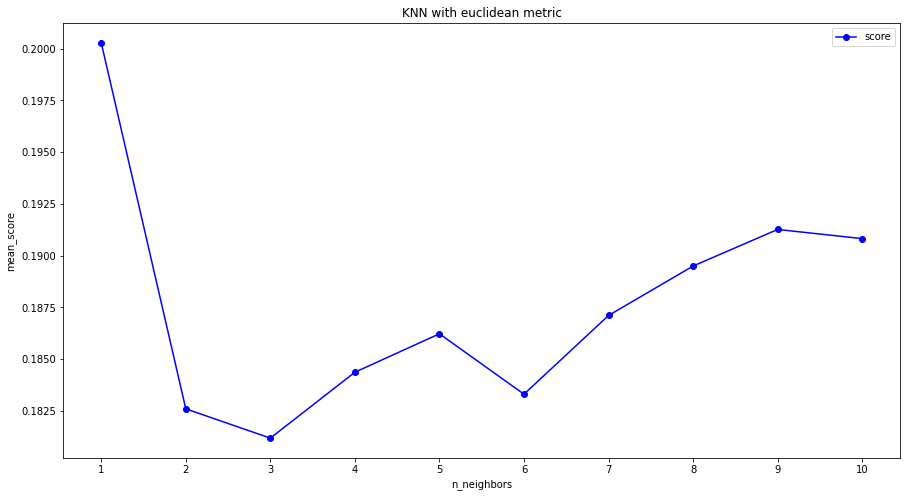

In [33]:
plotter(neighbor_history, score_history, 'euclidean')

Как изменится качество на валидации, если:

1. Используется косинусная метрика вместо евклидовой.
2. К текстам применяется TfIdf векторизацию( sklearn.feature_extraction.text.TfidfVectorizer)

Сравните модели, выберите лучшую.

In [34]:
best_param, best_score, neighbor_history, score_history = best_parameter(X, target, metric='cosine')

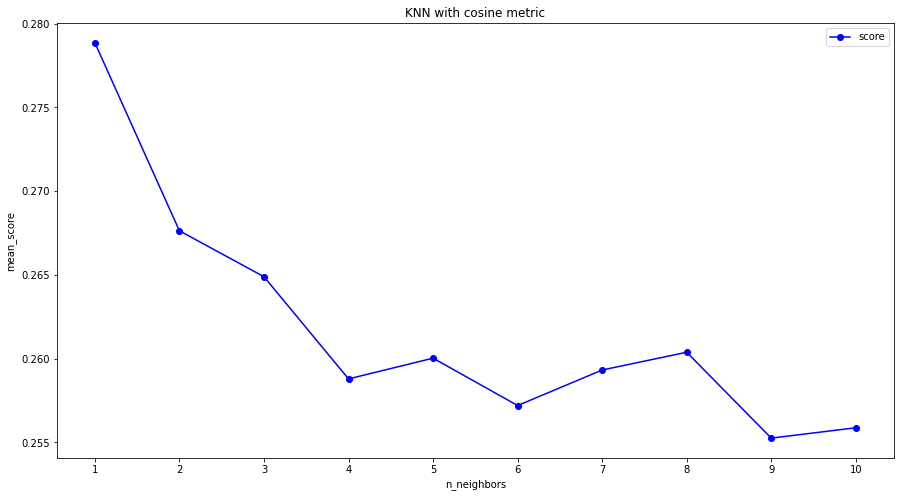

In [35]:
plotter(neighbor_history, score_history, 'cosine')

In [36]:
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=5000)
X = vectorizer.fit_transform(data).toarray()

In [37]:
best_param, best_score, neighbor_history, score_history = best_parameter(X, target)

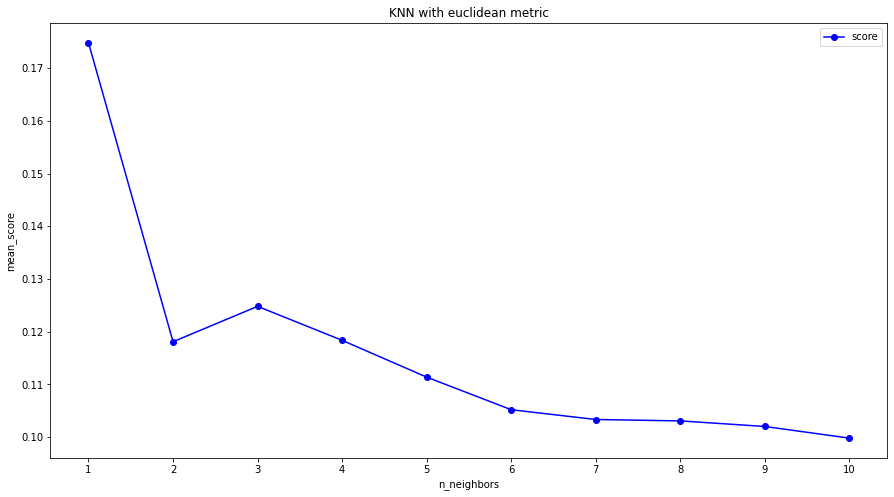

In [38]:
plotter(neighbor_history, score_history, 'euclidean')

In [39]:
best_param, best_score, neighbor_history, score_history = best_parameter(X, target, metric='cosine')

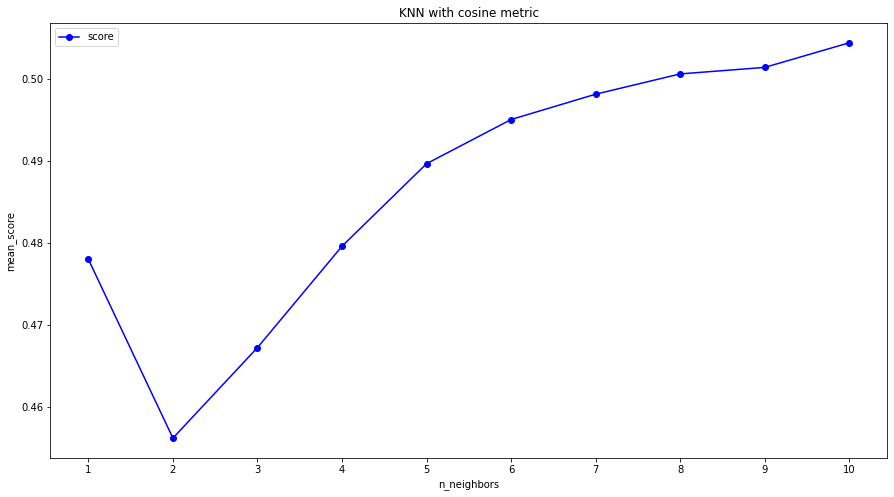

In [40]:
plotter(neighbor_history, score_history, 'cosine')

**Видим, что качество классификации сильно возросло при использовании косинусного расстояния, а также при использовании TfidVectorizer'а.**

**Таким образом, будем использовать векторизацию  TfidVectorizer и косинусное расстояние. Причем в такой комбинации оптимальным параметром является не n_neighbors = 1, как во всех предыдущих случаях. Остается только найти оптимальное количество соседей для такой модели**

In [41]:
#Возьмем параметры в бОльшем диапазоне, и с большим шагом, чтобы понять, где лучше всего искать
best_param, best_score, neighbor_history, score_history = \
                    best_parameter(X, target, min_n_neighbors=8, max_n_neighbors=50, step=4, metric='cosine')

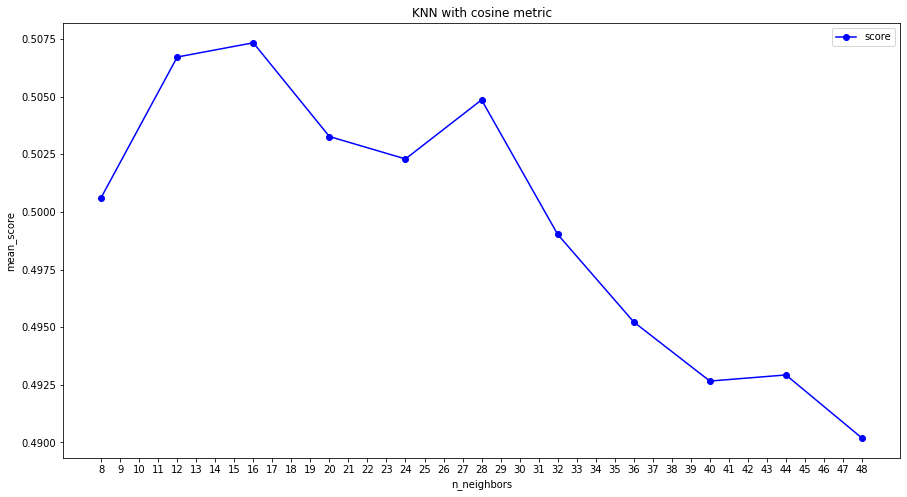

In [42]:
plotter(neighbor_history, score_history, 'cosine')

### Сузим наш поиск

In [43]:
best_param, best_score, neighbor_history, score_history = \
                    best_parameter(X, target, min_n_neighbors=12, max_n_neighbors=17, step=1, metric='cosine')

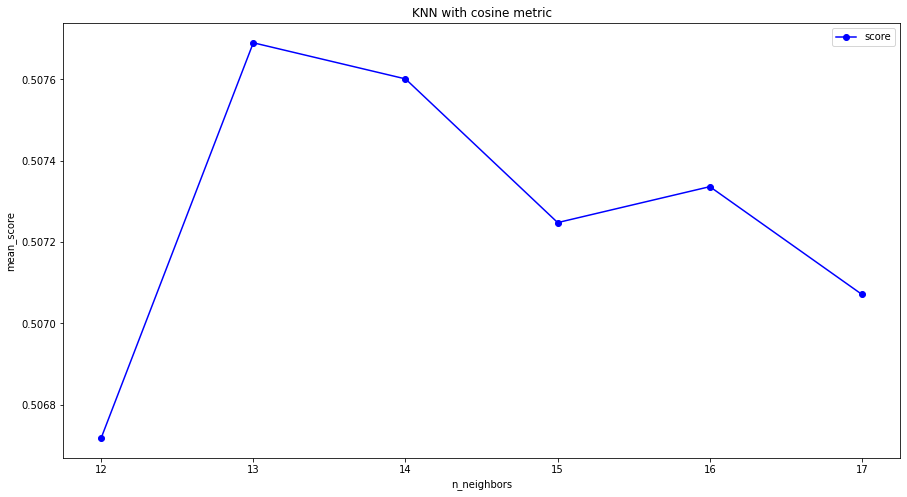

In [44]:
plotter(neighbor_history, score_history, 'cosine')

In [45]:
print('Number of neighbors:', best_param, '\nScore:', round(best_score, 5))

Number of neighbors: 13 
Score: 0.50769


Загрузим  теперь test  часть нашей выборки и преобразуем её аналогично с train частью. Не забудьте, что наборы слов в train и test части могут отличаться.

In [46]:
newsgroups = fetch_20newsgroups(subset='test',remove=['headers','footers', 'quotes'])

Оценим точность вашей лучшей модели на test части датасета. Отличается ли оно от кросс-валидации? Попробуйте сделать выводы, почему отличается качество.

In [47]:
X_test = newsgroups['data']
y_test = newsgroups['target']

In [48]:
X_test = vectorizer.transform(X_test).toarray()

In [49]:
knn = MyKNeighborsClassifier(best_param, metric='cosine')
knn.fit(X, target)

In [50]:
y_pred = knn.predict(X_test)

In [51]:
final_score = accuracy_score(y_pred, y_test)

In [52]:
print('Final accuracy:', round(final_score, 5))

Final accuracy: 0.44756


### Вывод

**Качество на test заметно ниже, чем на кросс-валидации. Во-первых, мы обучаем векторайзер на тренировочной выборке. Тогда при трансформации тестовой выборки мы упускаем все токены, которых не было в тренировочной. На кросс-валидации мы работаем с данными, которые были векторизированны по всей обучающей выборке. Это не совсем честно, по-хорошему нужно для каждого сплита валидации делать следующие действия: обучать векторайзер только на тренировочной выборке, чтобы векторайзер 'не подсматривал' в валидационную часть. Тогда мы получим ниже качество на валидации, но зато более близкое к тому, что мы получим на test**

**Во-вторых, возможна некоторая неоднородность в данных и поэтому test и train немного отличаются** 